<a href="https://colab.research.google.com/github/Almasshaikh002/Almasshaikh002/blob/main/CSProj_cb002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("50_Startups.csv")

In [ ]:
data.head()

,rd_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,NewYork,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,NewYork,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
print(data.shape)
data.describe()

(50, 5)


,rd_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os

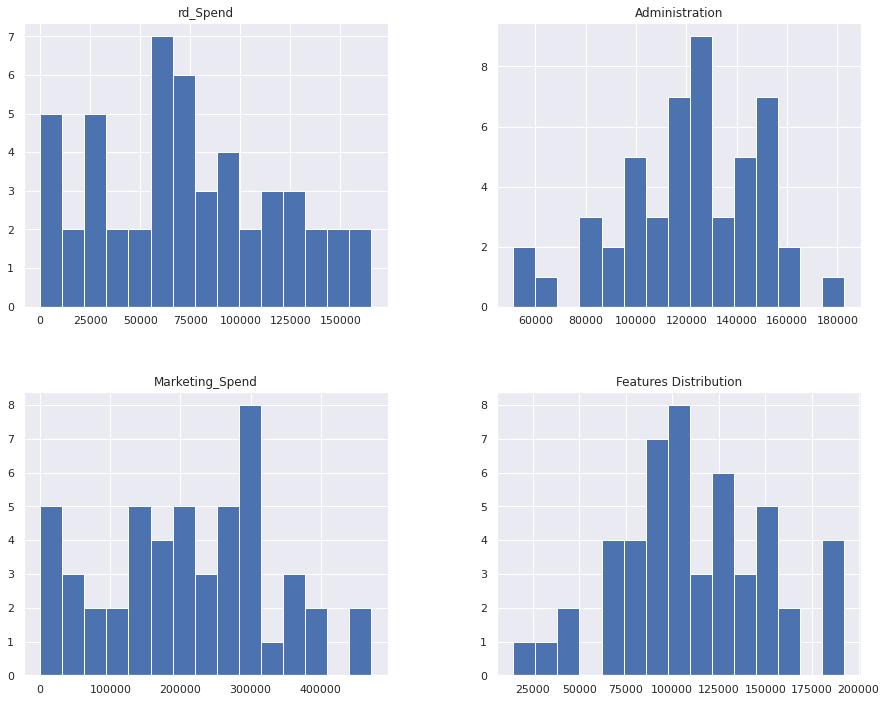

In [ ]:
data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os

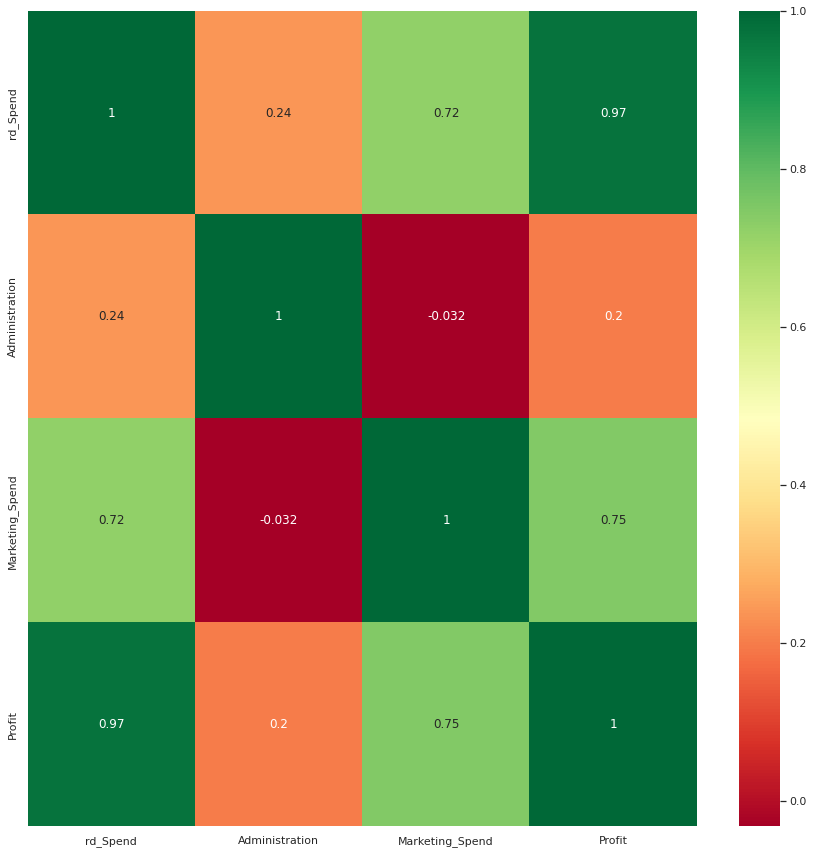

In [ ]:
plt.figure(figsize=(15,15))
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn') 

In [ ]:
X = data.drop(['State'],axis=1)
y = data['State']

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [ ]:
pca.get_covariance()

array([[ 2.10701715e+09,  3.11173891e+08,  4.06549535e+09,
         1.80000657e+09],
       [ 3.11173891e+08,  7.84997271e+08, -1.10169009e+08,
         2.26667336e+08],
       [ 4.06549535e+09, -1.10169009e+08,  1.49549201e+10,
         3.68577861e+09],
       [ 1.80000657e+09,  2.26667336e+08,  3.68577861e+09,
         1.62458817e+09]])

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.88257072, 0.08414886, 0.03084867])

In [ ]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [ ]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [ ]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.42857142857142855 %
Test score after PCA 0.4 %


In [ ]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [ ]:
model = LinearDiscriminantAnalysis()
model.fit(X, y)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.11333333333333336


In [ ]:
pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 592 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 199 kB 12.0 MB/s 
     |████████████████████████████████| 8.8 MB 53.8 MB/s 
     |████████████████████████████████| 98 kB 8.8 MB/s 
     |████████████████████████████████| 468 kB 60.3 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=f7824d397c987cdfc7b4b24be774f4554e75b82090a7ede7a310c50737695b34
  Stored in directory: /root/.cache/pip/wheels/f5/8f/2e/a689c21bc4bf04f84ceebf4b1f5846cacc04bfe179e7ad5ab0
Successfully built factor-analyzer


In [ ]:
from factor_analyzer import FactorAnalyzer

In [ ]:
data = data.drop(['State'],axis=1)

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data)
chi_square_value,p_value

(183.37933237332214, 6.497811601828171e-37)

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo

In [ ]:
kmo_all , kmo_model = calculate_kmo(data)
print(kmo_all,kmo_model)

[0.62473805 0.4364736  0.88771944 0.62288925] 0.667627376052494


In [ ]:
kmo_model

0.667627376052494

In [ ]:
fa = FactorAnalyzer(n_factors =3,rotation= 'varimax')
fa.fit(data)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [ ]:
fa.get_factor_variance()

(array([2.46138351, 0.50920805, 0.02247941]),
 array([0.61534588, 0.12730201, 0.00561985]),
 array([0.61534588, 0.74264789, 0.74826774]))

In [ ]:
ev, v= fa.get_eigenvalues()

In [ ]:
fa = FactorAnalyzer()
fa.fit(data)
#fa.analyze(df, 6, rotation="varimax")
fa.loadings_

array([[ 0.89058071,  0.30107885, -0.02281388],
       [-0.0141579 ,  0.52072838,  0.00313698],
       [ 0.87870611, -0.24157478,  0.00382262],
       [ 0.93682594,  0.0449777 ,  0.23277552]])

In [ ]:
data.shape[1]+1

5

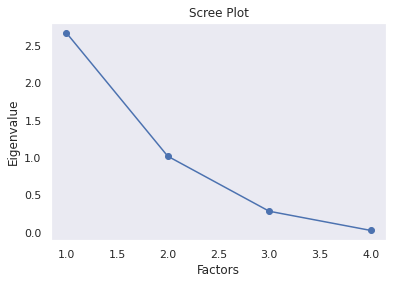

In [ ]:
# Create scree plot using matplotlib
plt.scatter(range(1,data.shape[1]+1),ev)
plt.plot(range(1,data.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
data1 = data.values

X=data1 [:, 0:5]
Y= data1 [: , -1]

print(X.shape)
print(Y.shape)

train_x = X[: 112, ]
train_y = Y[:112, ]

test_x = X[112:150, ]
test_y = Y[112:150, ]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(50, 4)
(50,)
(50, 4)
(50,)
(0, 4)
(0,)


In [ ]:
data.isnull().sum()

rd_Spend           0
Administration     0
Marketing_Spend    0
Profit             0
dtype: int64

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(train_x, train_y)

# training predictions
train_labels= kmeans.predict(train_x)


In [ ]:
print(accuracy_score(train_y, train_labels)*100)


ValueError: ignored